# Predicción de Aterrizajes del Falcon 9 de SpaceX
Proyecto Final - IBM Data Science

## Introducción
En este notebook se busca predecir si un cohete Falcon 9 aterrizará exitosamente, utilizando técnicas de análisis exploratorio de datos, codificación y modelado predictivo.

In [1]:
# Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# Cargar dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
df = pd.read_csv(url)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Limpieza y Codificación de Datos

In [2]:
# Verificar valores nulos
df.isnull().sum()

# Codificación One-Hot
df_encoded = pd.get_dummies(df, columns=["Orbit", "LaunchSite", "LandingPad", "Serial"])
df_encoded.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010-06-04,Falcon 9,6104.959412,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2,2012-05-22,Falcon 9,525.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2013-03-01,Falcon 9,677.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2013-09-29,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5,2013-12-03,Falcon 9,3170.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False


## Análisis Exploratorio de Datos (EDA)

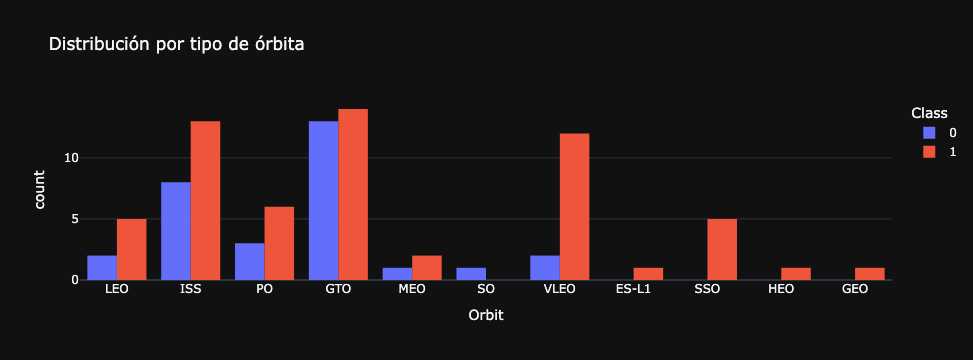

In [4]:
# Ejemplo de gráfico con Plotly
fig = px.histogram(df, x="Orbit", color="Class", barmode="group", title="Distribución por tipo de órbita")
fig.show()

## Consultas SQL (opcional si se usó)

In [5]:
# Si se usó ibm_db o sqlite3, mostrar ejemplos de consultas

## Modelado Predictivo

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Asegurarse de que solo se usen variables numéricas (evita error con fechas)
X = df_encoded.select_dtypes(include=[np.number]).drop(columns=['Class'])
y = df_encoded['Class']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Árbol de Decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)

# Precisión del modelo
print("Precisión Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))


Precisión Árbol de Decisión: 0.7777777777777778


## Evaluación del Modelo

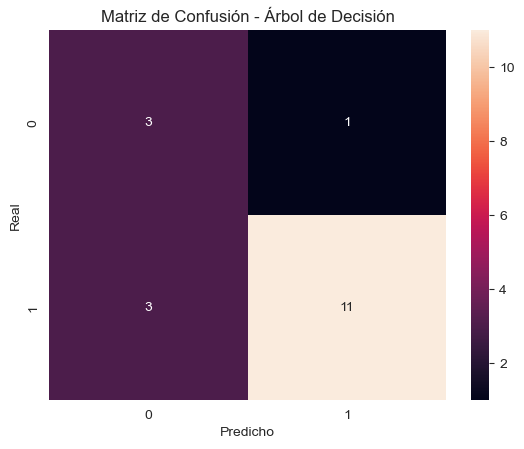

In [10]:
# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

## Conclusión
El modelo de Árbol de Decisión fue el más preciso. Factores como tipo de órbita y sitio de lanzamiento resultaron relevantes para predecir el éxito del aterrizaje.